# **Importando bibliotecas**

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# **Carregando Dataset**

In [2]:
# Carregar o conjunto de dados
df = pd.read_csv('/content/titles.csv')

# Visualizar as primeiras linhas do conjunto de dados
print(df.head(5))

         id               title   type  \
0  tm155702    The Wizard of Oz  MOVIE   
1   tm83648        Citizen Kane  MOVIE   
2   tm77588          Casablanca  MOVIE   
3   tm82363       The Big Sleep  MOVIE   
4   tm84701  The Maltese Falcon  MOVIE   

                                         description  release_year  \
0  Young Dorothy finds herself in a magical world...          1939   
1  Newspaper magnate, Charles Foster Kane is take...          1941   
2  In Casablanca, Morocco in December 1941, a cyn...          1942   
3  Private Investigator Philip Marlowe is hired b...          1946   
4  A private detective takes on a case that invol...          1941   

  age_certification  runtime                            genres  \
0                 G      102             ['fantasy', 'family']   
1                PG      119                         ['drama']   
2                PG      102       ['drama', 'romance', 'war']   
3               NaN      116             ['thriller', 'crime']

# **Exploração dos dados**

In [3]:
# Quantidade de linhas e de colunas do dataframe
df.shape

(3294, 15)

In [4]:
# Primeiros 5 registros
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [5]:
# Últimos 5 registros
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",['PR'],NaN,NaN,NaN,NaN,8.425,8.1
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],['PA'],NaN,tt9257620,5.9,50.0,1.400,2.0
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],[],NaN,tt15532736,NaN,NaN,NaN,NaN
3293,tm989132,The Infamous Future,MOVIE,The untold story of New York City's Eagle Acad...,2021,NaN,40,['documentation'],['US'],NaN,tt9064760,NaN,NaN,1.101,5.3


In [6]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3294 non-null   object 
 1   title                 3294 non-null   object 
 2   type                  3294 non-null   object 
 3   description           3282 non-null   object 
 4   release_year          3294 non-null   int64  
 5   age_certification     2086 non-null   object 
 6   runtime               3294 non-null   int64  
 7   genres                3294 non-null   object 
 8   production_countries  3294 non-null   object 
 9   seasons               756 non-null    float64
 10  imdb_id               2968 non-null   object 
 11  imdb_score            2922 non-null   float64
 12  imdb_votes            2911 non-null   float64
 13  tmdb_popularity       3261 non-null   float64
 14  tmdb_score            3026 non-null   float64
dtypes: float64(5), int64(

In [7]:
# Descrição estatística do Dataset
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,3294.000000,3294.000000,756.000000,2922.000000,2.911000e+03,3261.000000,3026.000000
mean,2001.194293,80.914997,2.998677,6.883949,6.461835e+04,21.105891,6.850099
std,23.542337,38.475347,3.651181,1.059668,1.754617e+05,89.137800,1.081377
min,1901.000000,1.000000,1.000000,1.500000,5.000000e+00,0.050393,1.000000
25%,1995.000000,51.250000,1.000000,6.300000,9.245000e+02,3.450000,6.200000
50%,2010.000000,89.000000,2.000000,7.000000,8.071000e+03,8.561000,6.900000
75%,2018.000000,106.000000,4.000000,7.600000,4.764500e+04,17.711000,7.500000
max,2022.000000,255.000000,52.000000,9.400000,2.555504e+06,4447.894000,10.000000


# **Dados ausentes**

In [8]:
# Valores nulos no dataset
df.isnull().sum()

id                         0
title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

In [9]:
# Preencher valores nulos na coluna de descrição com "Desconhecido"
df['description'].fillna('Desconhecido', inplace=True)

# Preencher valores nulos na coluna de classificação de idade com "Desconhecido"
df['age_certification'].fillna('Desconhecido', inplace=True)

# Preencher valores nulos na coluna de temporadas com 0 (para títulos que não são séries)
df['seasons'].fillna(0, inplace=True)

# Preencher valores nulos na coluna de imdb_id com "Desconhecido"
df['imdb_id'].fillna('Desconhecido', inplace=True)

# Preencher valores nulos nas colunas de pontuação e votos com 0
df['imdb_score'].fillna(0, inplace=True)
df['imdb_votes'].fillna(0, inplace=True)
df['tmdb_popularity'].fillna(0, inplace=True)
df['tmdb_score'].fillna(0, inplace=True)

In [10]:
# Atualização de valores nulos no DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3294 non-null   object 
 1   title                 3294 non-null   object 
 2   type                  3294 non-null   object 
 3   description           3294 non-null   object 
 4   release_year          3294 non-null   int64  
 5   age_certification     3294 non-null   object 
 6   runtime               3294 non-null   int64  
 7   genres                3294 non-null   object 
 8   production_countries  3294 non-null   object 
 9   seasons               3294 non-null   float64
 10  imdb_id               3294 non-null   object 
 11  imdb_score            3294 non-null   float64
 12  imdb_votes            3294 non-null   float64
 13  tmdb_popularity       3294 non-null   float64
 14  tmdb_score            3294 non-null   float64
dtypes: float64(5), int64(

In [11]:
# Retorno de valores ausentes
df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

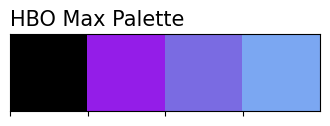

In [12]:
# Paleta de cores
sns.palplot(['#000000', '#941de8','#7a6be2', '#7ba7f2'])

plt.title("HBO Max Palette ",loc='left',fontsize=15,y=1)
plt.show()

# **Principais conteúdos da HBO Max**

In [13]:
# Ordenar os títulos pela pontuação no IMDB em ordem decrescente
top_imdb_scores = df.sort_values(by='imdb_score', ascending=False)

# Ordenar os títulos pela popularidade no TMDB em ordem decrescente
top_tmdb_popularity = df.sort_values(by='tmdb_popularity', ascending=False)

# Ordenar os títulos pelo número de votos no IMDB em ordem decrescente
top_imdb_votes = df.sort_values(by='imdb_votes', ascending=False)

# Visualizar os títulos mais populares
print("Top 10 títulos com maior pontuação no IMDB:")
print(top_imdb_scores[['title', 'imdb_score']].head(10))

print("\nTop 10 títulos com maior popularidade no TMDB:")
print(top_tmdb_popularity[['title', 'tmdb_popularity']].head(10))

print("\nTop 10 títulos com mais votos no IMDB:")
print(top_imdb_votes[['title', 'imdb_votes']].head(10))

Top 10 títulos com maior pontuação no IMDB:
                         title  imdb_score
1038          Band of Brothers         9.4
2531                 Chernobyl         9.4
1030                  The Wire         9.3
2330                    Lamput         9.3
725   The Shawshank Redemption         9.3
712               The Sopranos         9.2
2275         Emergency Contact         9.2
1706           Game of Thrones         9.2
669          Eyes on the Prize         9.2
1878            Rick and Morty         9.2

Top 10 títulos com maior popularidade no TMDB:
                         title  tmdb_popularity
2974                The Batman         4447.894
2987                  The Baby          757.816
2991  The Matrix Resurrections          641.541
3016                      Kimi          565.886
2997            The King's Man          559.090
3005           Superman & Lois          527.634
1706           Game of Thrones          492.101
2529                  Euphoria          445.399
299

# **Usando apenas os primeiros gêneros de cada título**

In [14]:
# Visualizar a coluna 'genre' e listar todos os gêneros únicos
unique_genres = df['genres'].str.split(', ').explode().unique()
print(unique_genres)

["['fantasy'" "'family']" "['drama']" "['drama'" "'romance'" "'war']"
 "['thriller'" "'crime']" "['war'" "'drama'" "'history']" "['animation'"
 "'comedy'" "'family'" "'action']" "['western'" "'drama']" "'thriller'"
 "['romance'" "'comedy']" "'music']" "'european'" "'horror']" "['comedy'"
 "'war'" "['thriller']" "'european']" "['horror'" "'documentation'"
 "'fantasy'" "'horror'" "'scifi']" "'romance']" "['crime'" "'thriller']"
 "'history'" "['action'" "'western'" "['scifi'" "'music'" "'fantasy']"
 "'sport']" "'sport'" "['western']" "'crime'" "['history'"
 "'documentation']" "['comedy']" "['music'" "'western']" "'action'"
 "'animation'" "'scifi'" "['documentation'" "['fantasy']" "['romance']"
 '[]' "['documentation']" "['crime']" "['scifi']" "['family'"
 "'animation']" "['horror']" "'reality'" "['animation']" "'reality']"
 "['sport']" "['reality'" "['reality']" "['music']" "['european']"
 "['war']" "['family']" "['action']"]


In [15]:
# Copiar o DataFrame original para evitar alterações indesejadas
df_copy = df.copy()

# Pré-processamento para considerar apenas o primeiro gênero de cada título
df['first_genre'] = df['genres'].str.split(',').str[0].str.strip()

# Remover os caracteres '[]' e "''" do início e fim dos gêneros
df['first_genre'] = df['first_genre'].str.strip("[]'")

# Preencher valores vazios na coluna 'first_genre' com a categoria "Outros"
df['first_genre'].replace('', 'outros', inplace=True)

# Contar a quantidade de títulos em cada gênero
genre_counts = df['first_genre'].value_counts()

# Calcular o total de títulos
total_titles = len(df)

# Imprimir o resultado
print("Quantidade de Títulos por Gênero:")
print(genre_counts)
print("\nTotal de Títulos:", total_titles)

Quantidade de Títulos por Gênero:
drama            746
comedy           606
documentation    548
thriller         262
scifi            191
fantasy          162
romance          139
action           121
crime            110
animation         99
horror            69
outros            53
reality           53
western           38
music             33
family            23
history           22
war               14
sport              3
european           2
Name: first_genre, dtype: int64

Total de Títulos: 3294


# **Quantidade de títulos por gênero**

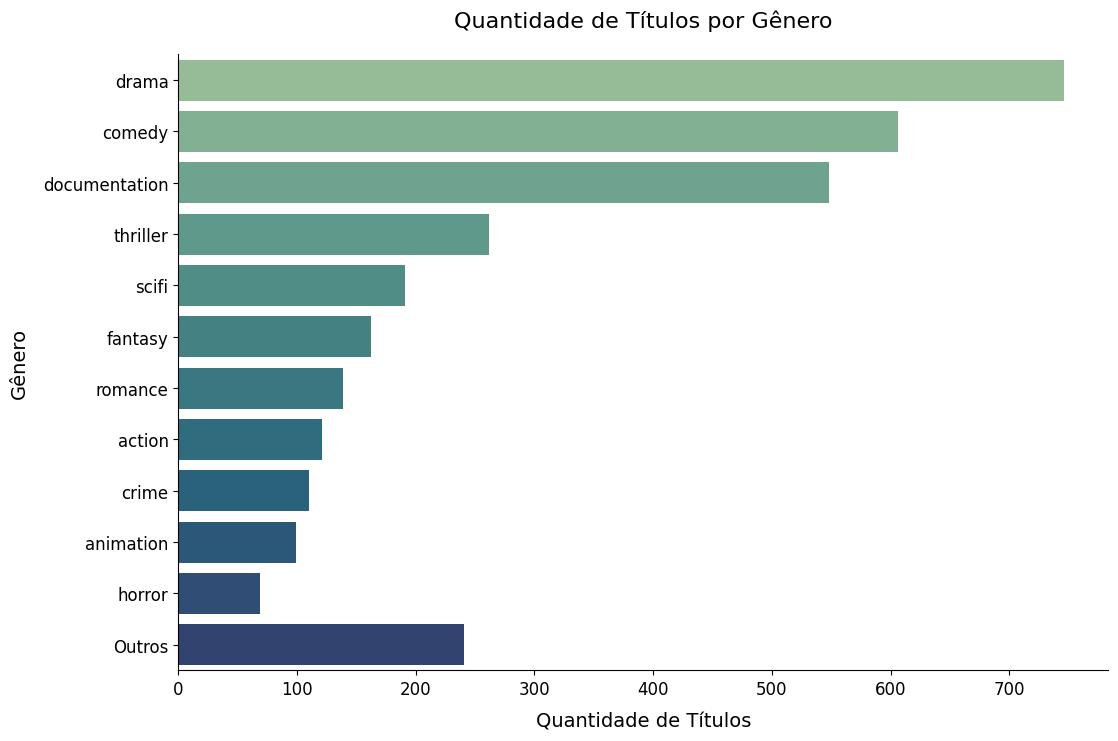

In [16]:
# Ordenar os gêneros de acordo com a quantidade de títulos (ordem decrescente)
genre_counts = genre_counts.sort_values(ascending=False)

# Agrupar categorias pouco representativas em uma categoria "Outros"
threshold = 55
other_genres_count = genre_counts[genre_counts < threshold].sum()
genre_counts = genre_counts[genre_counts >= threshold]
genre_counts['Outros'] = other_genres_count

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='crest')
plt.title('Quantidade de Títulos por Gênero', fontsize=16, pad=20)
plt.xlabel('Quantidade de Títulos', fontsize=14, labelpad=10)
plt.ylabel('Gênero', fontsize=14, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(ha='right')
sns.despine()
plt.show()

# **Filmes x Séries**

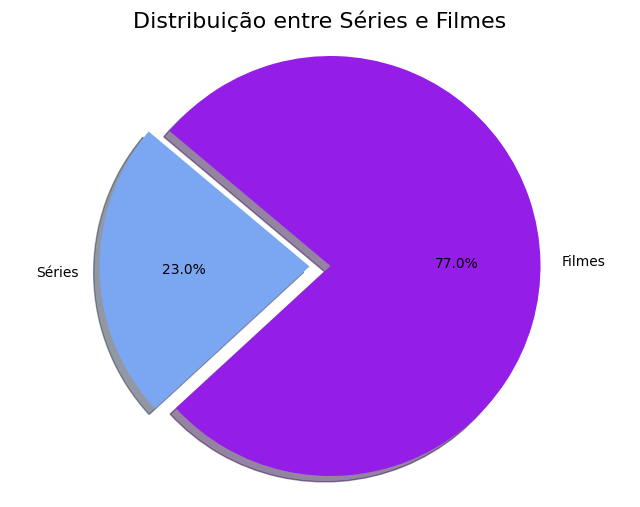

In [17]:
# Contar a quantidade de séries e filmes
type_counts = df['type'].value_counts()

# Calcular as porcentagens
total_count = len(df)
percentage_series = (type_counts['SHOW'] / total_count) * 100
percentage_movies = (type_counts['MOVIE'] / total_count) * 100

# Configurar os dados para o gráfico de pizza
labels = ['Séries', 'Filmes']
sizes = [percentage_series, percentage_movies]
colors = ['#7ba7f2', '#941de8']
explode = (0.1, 0)

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribuição entre Séries e Filmes', fontsize=16)
plt.show()

# **Transformando a classificação indicativa no padrão brasileiro**

In [18]:
# Visualizar a coluna 'age_certification' e listar todos as classificações únicas
unique_ages = df['age_certification'].str.split(', ').explode().unique()
print(unique_ages)

['G' 'PG' 'Desconhecido' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-PG' 'TV-Y7' 'NC-17'
 'TV-14' 'TV-MA']


In [19]:
# Mapeamento das classificações indicativas americanas para as brasileiras
age_mapping = {
    'G': 'Livre',
    'TV-G': 'Livre',
    'TV-Y': 'Livre',
    'PG': '10/12',
    'TV-Y7': '10/12',
    'PG-13': '14',
    'TV-14': '14',
    'TV-PG': '14',
    'R': '16',
    'NC-17': '18',
    'TV-MA': '18',
    'Desconhecido': 'Desconhecido'
}

# Aplicar o mapeamento à coluna 'age_certification' do DataFrame
df['age_certification_brasil'] = df['age_certification'].map(age_mapping)

# Visualizar a coluna 'age_certification_brasil' e listar todas as classificações únicas brasileiras
unique_ages_brasil = df['age_certification_brasil'].unique()
print(unique_ages_brasil)

['Livre' '10/12' 'Desconhecido' '14' '16' '18']


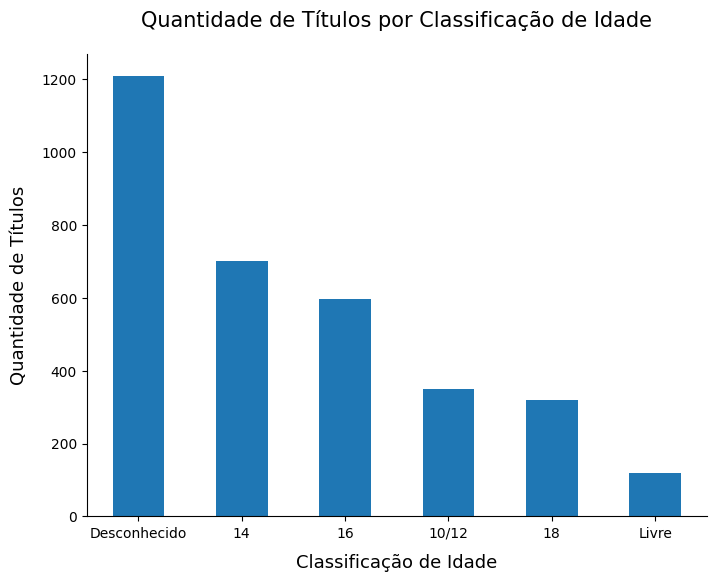

In [20]:
# Contar a quantidade de títulos em cada classificação de idade
age_cert_counts = df['age_certification_brasil'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
age_cert_counts.plot(kind='bar')
plt.title('Quantidade de Títulos por Classificação de Idade', fontsize=15, pad=20)
plt.xlabel('Classificação de Idade', fontsize=13, labelpad=10)
plt.ylabel('Quantidade de Títulos', fontsize=13, labelpad=10)
plt.xticks(rotation=0, fontsize=10)
sns.despine()
plt.show()

# **Recomendações de títulos com base na descrição**

In [21]:
# Pré-processamento das descrições (remover nulos e transformar em texto)
df['description'] = df['description'].fillna('')
text_data = df['description']

# Aplicar o TF-IDF nas descrições
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Calcular a similaridade cosseno entre os títulos com base nas descrições
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Função para obter recomendações de títulos com base em uma entrada
def get_recommendations(title):
    # Verificar se o título fornecido está presente no conjunto de dados
    if title not in df['title'].values:
        print(f"O título '{title}' não foi encontrado no conjunto de dados.")
        return []

    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Remover o índice do título fornecido da lista de recomendações
    sim_scores = [score for score in sim_scores if score[0] != idx]

    # Obter os índices dos títulos mais similares
    title_indices = [i[0] for i in sim_scores[:10]]

    # Retornar os títulos recomendados
    return df['title'].iloc[title_indices]

# Exemplo de recomendação para um título específico
input_title = 'Game of Thrones'  # Substituir pelo título desejado
recommendations = get_recommendations(input_title)
print(f"Recomendações para '{input_title}':")
print(recommendations)

Recomendações para 'Game of Thrones':
1908         Percy Jackson: Sea of Monsters
2132                              The Brink
1580                     Wartorn: 1861-2010
409             The Marriage of Maria Braun
2712                          Human Capital
1038                       Band of Brothers
418                        Hearts and Minds
1624     Bill Maher: Victory Begins at Home
27      The Life and Death of Colonel Blimp
1832                               Profugos
Name: title, dtype: object


# **Recomendações de títulos com base na classificação de idade (18+)**

In [22]:
# Pré-processamento da classificação de idade (remover nulos e transformar em texto)
df['age_certification_brasil'] = df['age_certification_brasil'].fillna('')
age_data = df['age_certification_brasil']

# Aplicar o TF-IDF na classificação de idade
age_tfidf_vectorizer = TfidfVectorizer()
age_tfidf_matrix = age_tfidf_vectorizer.fit_transform(age_data)

# Calcular a similaridade cosseno entre os títulos com base na classificação de idade
age_cosine_sim = linear_kernel(age_tfidf_matrix, age_tfidf_matrix)

def get_age_recommendations(title):
    # Verificar se o título fornecido está presente no conjunto de dados
    if title not in df['title'].values:
        print(f"O título '{title}' não foi encontrado no conjunto de dados.")
        return []

    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(age_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Remover o índice do título fornecido da lista de recomendações
    sim_scores = [score for score in sim_scores if score[0] != idx]

    # Obter os índices dos títulos mais similares
    title_indices = [i[0] for i in sim_scores[:10]]

    # Retornar os títulos recomendados com suas respectivas classificações de idade
    return df[['title', 'age_certification_brasil']].iloc[title_indices]

# Exemplo de recomendação para um título específico com base na classificação de idade
input_title = 'Chernobyl'  # Substituir pelo título desejado
age_recommendations = get_age_recommendations(input_title)
print(f"Recomendações baseadas na classificação de idade para '{input_title}':")
print(age_recommendations)

Recomendações baseadas na classificação de idade para 'Chernobyl':
                           title age_certification_brasil
324                      Onibaba                       18
618      Tie Me Up! Tie Me Down!                       18
708                   South Park                       18
712                 The Sopranos                       18
714  Mr. Show with Bob and David                       18
724         Curb Your Enthusiasm                       18
758       Aqua Teen Hunger Force                       18
763             Sex and the City                       18
787                           Oz                       18
800       The Larry Sanders Show                       18


# **Recomendações de títulos com base no gênero (Comédia)**

In [23]:
# Pré-processamento dos gêneros (remover nulos e transformar em texto)
df['first_genre'] = df['first_genre'].fillna('')
genres_data = df['first_genre']

# Aplicar o TF-IDF nos gêneros
genres_tfidf_vectorizer = TfidfVectorizer()
genres_tfidf_matrix = genres_tfidf_vectorizer.fit_transform(genres_data)

# Calcular a similaridade cosseno entre os títulos com base no gênero
genres_cosine_sim = linear_kernel(genres_tfidf_matrix, genres_tfidf_matrix)

# Função para obter recomendações de títulos com base no gênero
def get_genre_recommendations(title):
    # Verificar se o título fornecido está presente no conjunto de dados
    if title not in df['title'].values:
        print(f"O título '{title}' não foi encontrado no conjunto de dados.")
        return []

    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(genres_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Remover o índice do título fornecido da lista de recomendações
    sim_scores = [score for score in sim_scores if score[0] != idx]

    # Obter os índices dos títulos mais similares
    title_indices = [i[0] for i in sim_scores[:10]]

    # Retornar os títulos recomendados com suas respectivas classificações de idade
    return df[['title', 'first_genre']].iloc[title_indices]

# Exemplo de recomendação para um título específico com base no gênero
input_title = 'The Office'  # Substituir pelo título desejado
genre_recommendations = get_genre_recommendations(input_title)
print(f"Recomendações baseadas no gênero para '{input_title}':")
print(genre_recommendations)

Recomendações baseadas no gênero para 'The Office':
                 title first_genre
15  The Great Dictator      comedy
24  To Be or Not to Be      comedy
29         42nd Street      comedy
44    The Gay Divorcee      comedy
46       The Gold Rush      comedy
61        Libeled Lady      comedy
62           Show Boat      comedy
63       Blithe Spirit      comedy
65           Pygmalion      comedy
67      Shall We Dance      comedy


# **Top 10 filmes mais bem votados e pontuados pelo IMDB**

In [24]:
# Calcular a métrica de popularidade com base na imdb_score e imdb_votes
# Considerando a média ponderada entre o imdb_score e o log do imdb_votes
# A ideia é que filmes/séries com uma alta pontuação no IMDB e um grande número de votos sejam considerados mais populares
# Aqui posso ajustar os pesos (w_score e w_votes) de acordo com minha preferência
w_score = 0.7
w_votes = 0.3
df['popularity_score'] = w_score * df['imdb_score'] + w_votes * df['imdb_votes'].apply(lambda x: x if x == 0 else np.log(x))

# Ordenar os títulos pela popularidade em ordem decrescente
top_popularity = df.sort_values(by='popularity_score', ascending=False)

# Exibir apenas os resultados dos títulos mais bem votados e pontuados
result = top_popularity[['title', 'imdb_score', 'imdb_votes']].head(10)

# Formatar o DataFrame para exibir as colunas lado a lado
styled_result = result.style.set_table_styles([{
    'selector': 'td',
    'props': [('padding', '5px'), ('text-align', 'left')]
}])

print("Top 10 títulos mais bem votados e pontuados:")
display(styled_result)

Top 10 títulos mais bem votados e pontuados:


,title,imdb_score,imdb_votes
725,The Shawshank Redemption,9.300000,2548100.000000
1706,Game of Thrones,9.200000,1983794.000000
1035,The Dark Knight,9.000000,2555504.000000
1209,The Lord of the Rings: The Return of the King,9.000000,1776725.000000
2531,Chernobyl,9.400000,693955.000000
1051,Inception,8.800000,2268288.000000
1033,The Lord of the Rings: The Fellowship of the Ring,8.800000,1798012.000000
1038,Band of Brothers,9.400000,440706.000000
1151,The Lord of the Rings: The Two Towers,8.800000,1604677.000000
732,The Matrix,8.700000,1857949.000000


# **Top 10 títulos mais populares pelo TMDB**

In [25]:
# Calcular a métrica de popularidade com base na tmdb_popularity e tmdb_score
# Considerando a média ponderada entre o tmdb_score e a raiz quadrada da tmdb_popularity
# A ideia é que filmes/séries com alta popularidade no TMDB e uma boa pontuação sejam considerados mais populares
# Aqui posso ajustar os pesos (w_score e w_popularity) de acordo com minha preferência
w_score = 0.1
w_popularity = 0.9
df['tmdb_popularity_score'] = w_score * df['tmdb_score'] + w_popularity * np.sqrt(df['tmdb_popularity'])

# Ordenar os títulos pela popularidade no TMDB em ordem decrescente
top_tmdb_popularity = df.sort_values(by='tmdb_popularity_score', ascending=False)

# Exibir apenas os resultados dos títulos mais populares com base no TMDB
result_tmdb = top_tmdb_popularity[['title', 'tmdb_score', 'tmdb_popularity']].head(10)

# Formatar o DataFrame para exibir as colunas lado a lado
styled_result_tmdb = result_tmdb.style.set_table_styles([{
    'selector': 'td',
    'props': [('padding', '5px'), ('text-align', 'left')]
}])

print("Top 10 títulos mais populares no TMDB:")
display(styled_result_tmdb)

Top 10 títulos mais populares no TMDB:


,title,tmdb_score,tmdb_popularity
2974,The Batman,7.800000,4447.894000
2987,The Baby,8.800000,757.816000
2991,The Matrix Resurrections,6.700000,641.541000
3016,Kimi,6.200000,565.886000
2997,The King's Man,6.900000,559.090000
3005,Superman & Lois,8.100000,527.634000
1706,Game of Thrones,8.400000,492.101000
2529,Euphoria,8.400000,445.399000
2990,Free Guy,7.700000,398.516000
2978,Death on the Nile,6.500000,386.008000


# **Matriz de correlação**

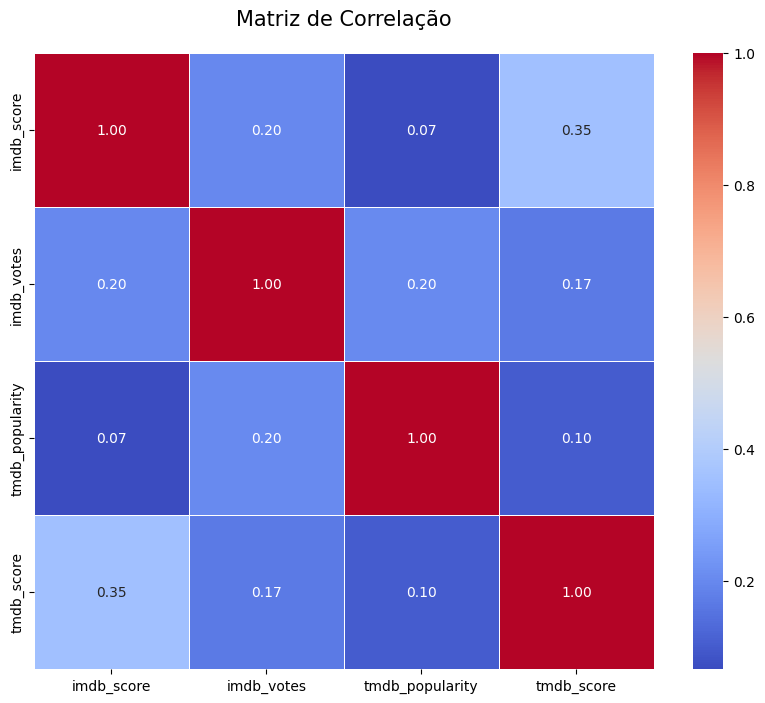

In [109]:
# Selecionar apenas as colunas numéricas relevantes para a matriz de correlação
numeric_columns = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# Calcular a matriz de correlação
correlation_matrix = df[numeric_columns].corr()

# Plotar a matriz de correlação em um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=15, pad=20)
plt.show()

Cada célula do heatmap mostra o valor da correlação entre duas variáveis, variando de -1 a 1. Um valor de 1 indica uma correlação perfeita e positiva, enquanto -1 indica uma correlação perfeita e negativa. Um valor próximo de 0 indica uma correlação fraca ou nula entre as variáveis.

Analisando a matriz de correlação, podemos observar que a correlação "mais forte" está entre **imdb_score** e **tmdb_score**, com um valor de aproximadamente **0.35**. Isso indica uma correlação positiva baixa entre as pontuações dos títulos no IMDb e TMDB.

Por outro lado, a correlação "menos forte" está entre **imdb_score** e **tmdb_popularity**, com um valor de aproximadamente **0.07**. Essa correlação é bastante baixa, indicando que a popularidade no TMDB tem uma relação fraca, quase nula, com as pontuações dos títulos no IMDb.

# **Desvio padrão entre as varíaves IMDB e TMDB**

In [42]:
# Calcular o desvio padrão das variáveis
imdb_score_std = np.std(df['imdb_score'])
imdb_votes_std = np.std(df['imdb_votes'])
tmdb_popularity_std = np.std(df['tmdb_popularity'])
tmdb_score_std = np.std(df['tmdb_score'])

# Imprimir os resultados
print(f"Desvio Padrão do IMDb Score: {imdb_score_std:.2f}")
print(f"Desvio Padrão do IMDb Votes: {imdb_votes_std:.2f}")
print(f"Desvio Padrão do TMDB Popularity: {tmdb_popularity_std:.2f}")
print(f"Desvio Padrão do TMDB Score: {tmdb_score_std:.2f}")

Desvio Padrão do IMDb Score: 2.40
Desvio Padrão do IMDb Votes: 166213.28
Desvio Padrão do TMDB Popularity: 88.70
Desvio Padrão do TMDB Score: 2.14


O desvio padrão do IMDb Score indica que as pontuações tendem a variar cerca de 2.40 pontos em relação à média. Já o desvio padrão do IMDb Votes é bastante alto, sugerindo que a quantidade de votos pode variar muito em relação à média.

Quanto ao TMDB Popularity, o desvio padrão é de aproximadamente 88.70, o que indica que a popularidade também pode variar consideravelmente em relação à média. Por fim, o desvio padrão do TMDB Score é de 2.14, indicando uma variação relativamente menor nas pontuações do TMDB.

# **Gráfico de dispersão IMDb Score x IMDb Votes**

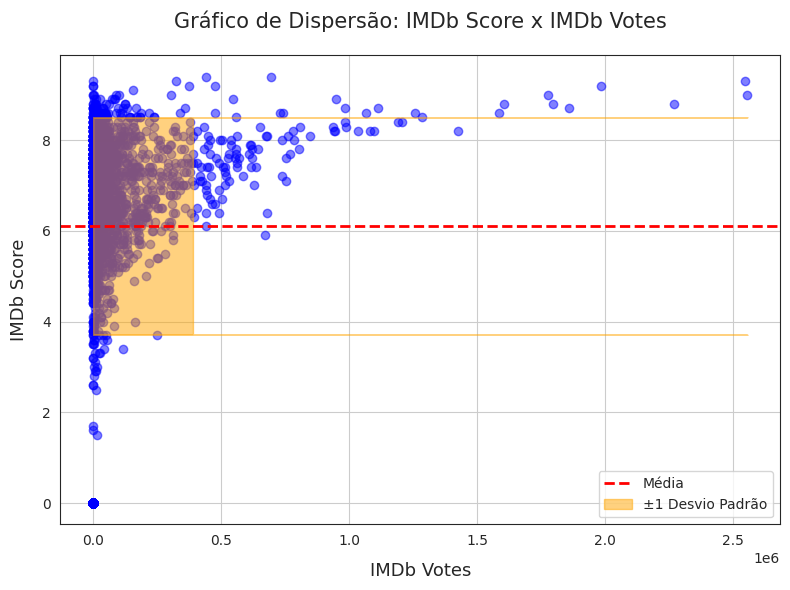

In [158]:
# Dados para o gráfico de dispersão IMDb Score vs IMDb Votes
imdb_score = df['imdb_score']
imdb_votes = df['imdb_votes']

# Calcular a média e o desvio padrão
imdb_score_mean = imdb_score.mean()
imdb_score_std = imdb_score.std()
imdb_votes_mean = imdb_votes.mean()
imdb_votes_std = imdb_votes.std()

# Plotar o gráfico de dispersão IMDb Score vs IMDb Votes
plt.figure(figsize=(8, 6))
plt.scatter(imdb_votes, imdb_score, alpha=0.5, color='blue')
plt.axhline(imdb_score_mean, color='red', linestyle='dashed', linewidth=2, label='Média')
plt.fill_between(imdb_votes, imdb_score_mean - imdb_score_std, imdb_score_mean + imdb_score_std,
                 color='orange', alpha=0.5, label='±1 Desvio Padrão')
plt.title('Gráfico de Dispersão: IMDb Score x IMDb Votes', fontsize=15, pad=20)
plt.xlabel('IMDb Votes', fontsize=13, labelpad=10)
plt.ylabel('IMDb Score', fontsize=13, labelpad=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

A linha vermelha representa a média dos valores de "IMDb Score", e a faixa laranja representa ±1 desvio padrão em relação à média.

A faixa de ±1 desvio padrão dá uma ideia de quão "espalhados" os pontos estão em relação à média. Se a maioria dos pontos estiver dentro dessa faixa, isso sugere que os dados estão relativamente próximos da média e que a dispersão é baixa. Por outro lado, se muitos pontos estiverem fora dessa faixa, isso indica que os dados têm uma dispersão maior em relação à média.

Os outliers são os pontos que estão distantes da média e da faixa laranja. São valores que se destacam do padrão geral da distribuição. Eles representam títulos que possuem valores incomuns para a pontuação no IMDb e/ou para a quantidade de votos no IMDb em comparação com a maioria dos outros títulos.

# **Gráfico de dispersão TMDB Popularity x TMDB Score**

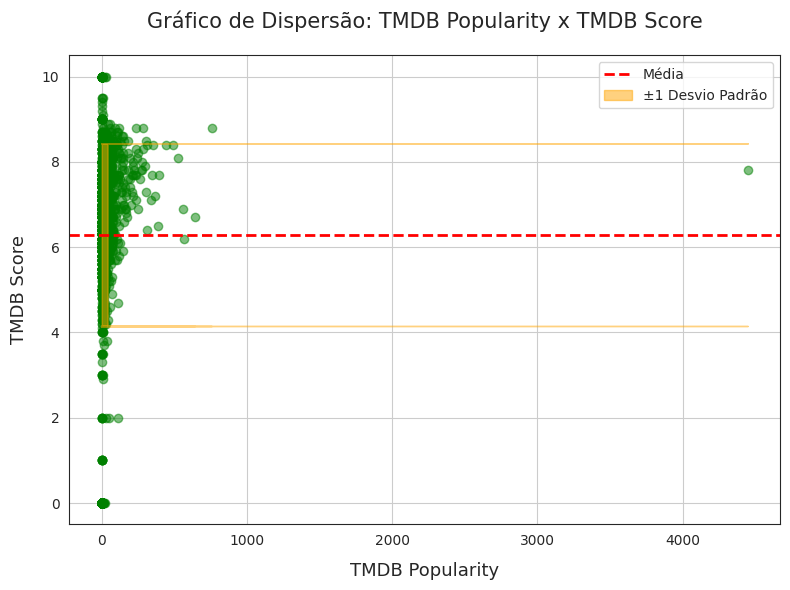

In [157]:
# Dados para o gráfico de dispersão TMDB Popularity vs TMDB Score
tmdb_popularity = df['tmdb_popularity']
tmdb_score = df['tmdb_score']

# Calcular a média e o desvio padrão
tmdb_popularity_mean = tmdb_popularity.mean()
tmdb_popularity_std = tmdb_popularity.std()
tmdb_score_mean = tmdb_score.mean()
tmdb_score_std = tmdb_score.std()

# Plotar o gráfico de dispersão TMDB Popularity vs TMDB Score
plt.figure(figsize=(8, 6))
plt.scatter(tmdb_popularity, tmdb_score, alpha=0.5, color='green')
plt.axhline(tmdb_score_mean, color='red', linestyle='dashed', linewidth=2, label='Média')
plt.fill_between(tmdb_popularity, tmdb_score_mean - tmdb_score_std, tmdb_score_mean + tmdb_score_std,
                 color='orange', alpha=0.5, label='±1 Desvio Padrão')
plt.title('Gráfico de Dispersão: TMDB Popularity x TMDB Score', fontsize=15, pad=20)
plt.xlabel('TMDB Popularity', fontsize=13, labelpad=10)
plt.ylabel('TMDB Score', fontsize=13, labelpad=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Assim como no gráfico anterior, os outliers são os pontos que estão distantes da média e da faixa laranja, representando títulos que possuem valores incomuns para a popularidade no TMDB e/ou para a pontuação no TMDB em comparação com a maioria dos outros títulos.

Através deste gráfico, podemos explorar a relação entre a popularidade de um título no TMDB (medida pelo número de visualizações, avaliações ou interações) e sua pontuação no TMDB. Podemos observar se títulos mais populares tendem a receber pontuações mais altas, ou se há alguma tendência entre a popularidade e a pontuação. Além disso, os outliers podem indicar títulos que possuem popularidade ou pontuação muito diferentes do padrão geral.

# **Análise de Variância (ANOVA)**

Para investigar se há diferença significativa nas pontuações do IMDb e TMDB entre os diferentes gêneros dos títulos.

In [70]:
# Selecionar as colunas relevantes do DataFrame
df_anova = df[['imdb_score', 'first_genre']].dropna()

# Realizar a ANOVA
result_imdb = stats.f_oneway(*[df_anova[df_anova['first_genre'] == genre]['imdb_score'] for genre in df_anova['first_genre'].unique()])

# Imprimir os resultados
print("Resultados da ANOVA para IMDb Score:")
print("Estatística F:", result_imdb.statistic)
print("Valor p:", result_imdb.pvalue)

Resultados da ANOVA para IMDb Score:
Estatística F: 24.186198480512854
Valor p: 1.441902525830683e-79


In [71]:
# Selecionar as colunas relevantes do DataFrame
df_anova_tmdb = df[['tmdb_score', 'first_genre']].dropna()

# Realizar a ANOVA
result_tmdb = stats.f_oneway(*[df_anova_tmdb[df_anova_tmdb['first_genre'] == genre]['tmdb_score'] for genre in df_anova_tmdb['first_genre'].unique()])

# Imprimir os resultados
print("Resultados da ANOVA para TMDB Score:")
print("Estatística F:", result_tmdb.statistic)
print("Valor p:", result_tmdb.pvalue)

Resultados da ANOVA para TMDB Score:
Estatística F: 31.245047661850744
Valor p: 7.576917705638935e-104


Na análise de variância (ANOVA), o valor de p representa a probabilidade de obter os resultados observados (ou resultados mais extremos) se a hipótese nula fosse verdadeira. No contexto da análise que realizei, a hipótese nula seria que não há diferença significativa nas pontuações entre os diferentes gêneros dos títulos.

Quando o valor de p é muito baixo (geralmente menor que o nível de significância de 0.05), isso significa que os resultados observados são altamente improváveis de ocorrer se a hipótese nula fosse verdadeira. Portanto, rejeitamos a hipótese nula e concluímos que existe uma diferença significativa nas pontuações entre os gêneros dos títulos.

Com base nos valores de p que obtive:

**IMDb Score:**

Estatística F: 24.19

Valor p: 1.44e-79 (muito menor que 0.05)

Conclusão: A hipótese nula é rejeita e conclui-se que há uma diferença significativa nas pontuações entre os gêneros dos títulos.

**TMDB Score:**

Estatística F: 31.25

Valor p: 7.58e-104 (muito menor que 0.05)

Conclusão: A hipótese nula é rejeita e conclui-se que há uma diferença significativa nas pontuações entre os gêneros dos títulos.

Com isso, a análise de variância permite afirmar que os gêneros têm um efeito significativo nas pontuações dos filmes em ambas as plataformas, IMDb e TMDB. As diferenças nas pontuações entre os gêneros são estatisticamente significantes.

# **Distribuição das pontuações (IMDb Score) por gênero**

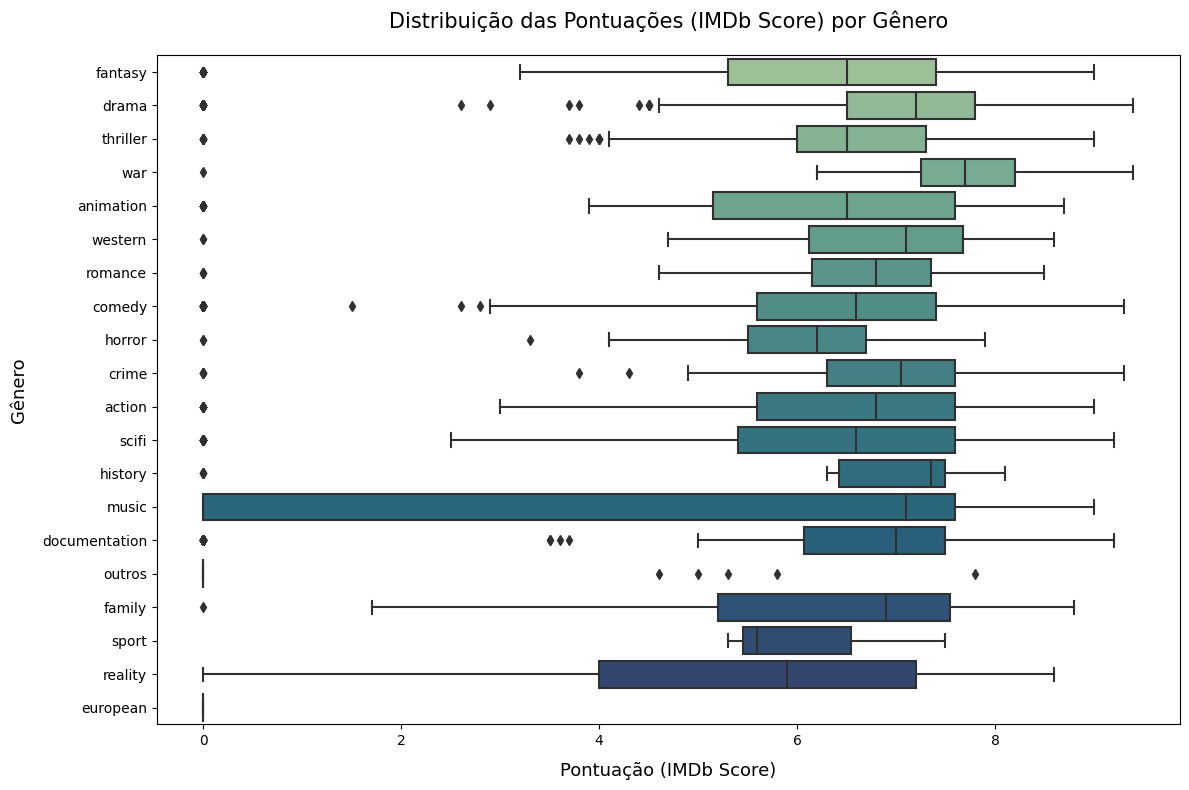

In [112]:
# Plotar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='imdb_score', y='first_genre', data=df, palette='crest', orient='h')
plt.title('Distribuição das Pontuações (IMDb Score) por Gênero', fontsize=15, pad=20)
plt.xlabel('Pontuação (IMDb Score)', fontsize=13, labelpad=10)
plt.ylabel('Gênero', fontsize=13, labelpad=10)
plt.tight_layout()
plt.show()

# **Média de pontuação (IMDb Score) por gênero**

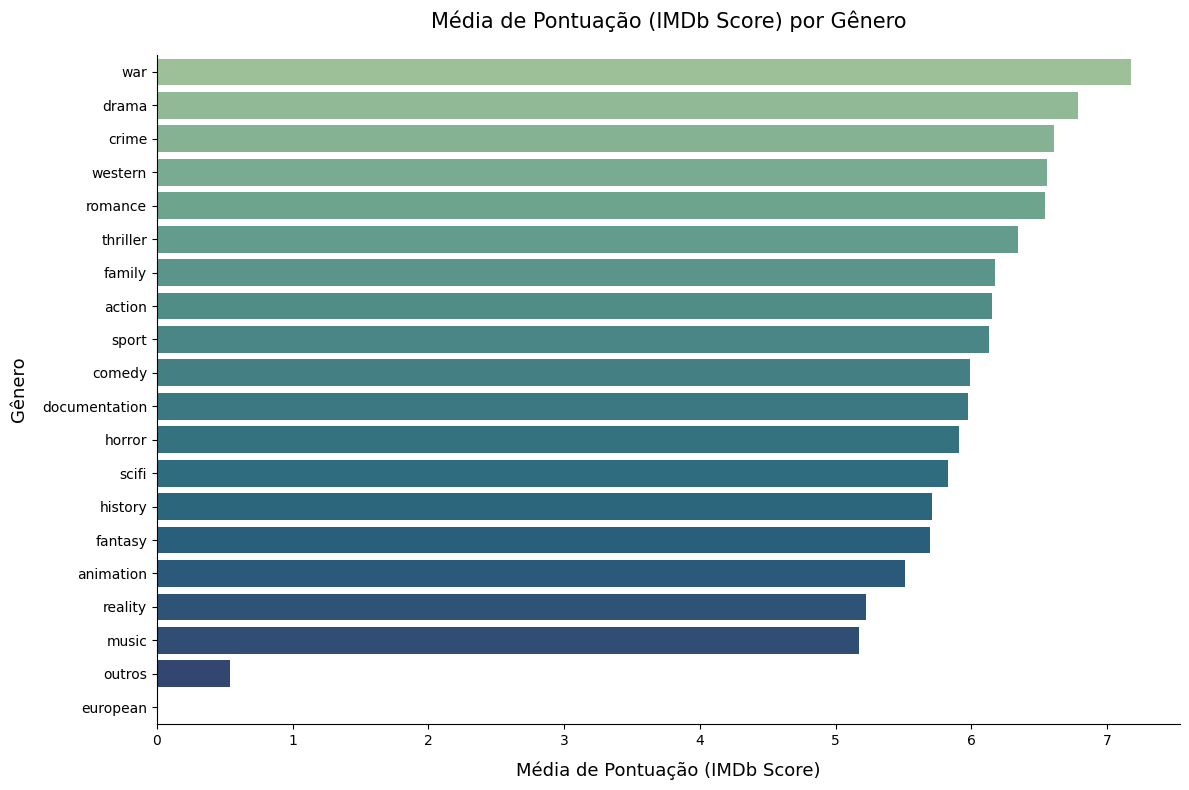

In [113]:
# Calcular a média das pontuações para cada gênero
genre_imdb_mean = df.groupby('first_genre')['imdb_score'].mean()

# Ordenar os gêneros pela média das pontuações em ordem decrescente
genre_imdb_mean = genre_imdb_mean.sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_imdb_mean.values, y=genre_imdb_mean.index, palette='crest')
plt.title('Média de Pontuação (IMDb Score) por Gênero', fontsize=15, pad=20)
plt.xlabel('Média de Pontuação (IMDb Score)', fontsize=13, labelpad=10)
plt.ylabel('Gênero', fontsize=13, labelpad=10)
plt.tight_layout()
sns.despine()
plt.show()

# **Distribuição das pontuações (TMDB Score) por gênero**

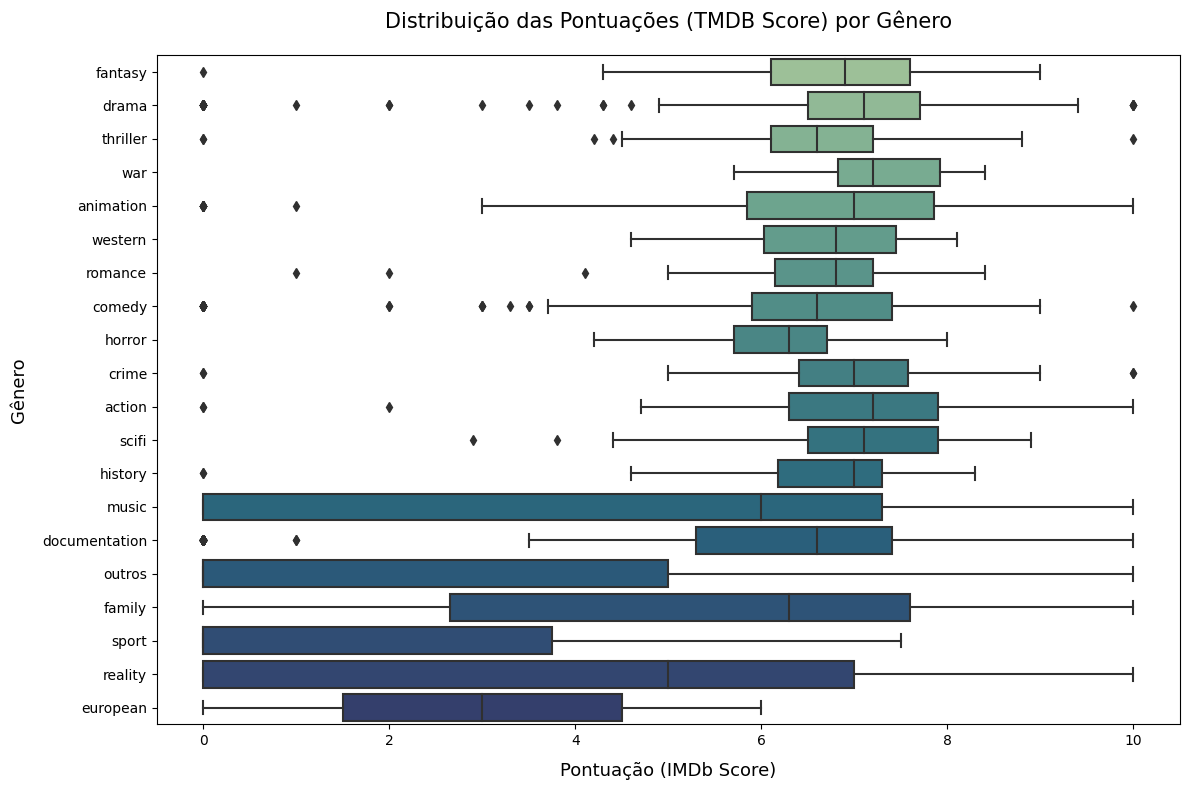

In [114]:
# Plotar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='tmdb_score', y='first_genre', data=df, palette='crest', orient='h')
plt.title('Distribuição das Pontuações (TMDB Score) por Gênero', fontsize=15, pad=20)
plt.xlabel('Pontuação (IMDb Score)', fontsize=13, labelpad=10)
plt.ylabel('Gênero', fontsize=13, labelpad=10)
plt.tight_layout()
plt.show()

# **Média de pontuação (TMDB Score) por gênero**

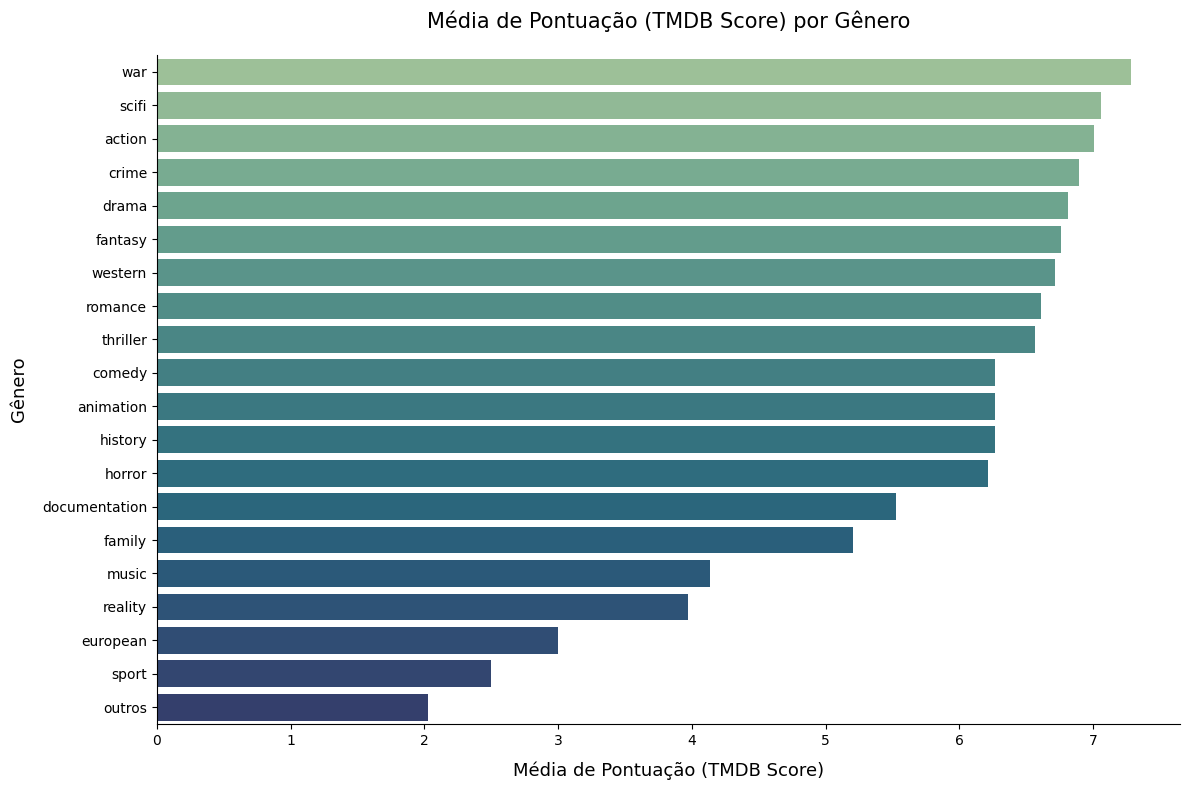

In [115]:
# Calcular a média das pontuações para cada gênero
genre_imdb_mean = df.groupby('first_genre')['tmdb_score'].mean()

# Ordenar os gêneros pela média das pontuações em ordem decrescente
genre_imdb_mean = genre_imdb_mean.sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_imdb_mean.values, y=genre_imdb_mean.index, palette='crest')
plt.title('Média de Pontuação (TMDB Score) por Gênero', fontsize=15, pad=20)
plt.xlabel('Média de Pontuação (TMDB Score)', fontsize=13, labelpad=10)
plt.ylabel('Gênero', fontsize=13, labelpad=10)
plt.tight_layout()
sns.despine()
plt.show()

# **Média de pontuação por gênero (IMDb Score x TMDB Score)**

In [81]:
# Calcular a média das pontuações para cada gênero no IMDb Score
genre_imdb_mean = df.groupby('first_genre')['imdb_score'].mean()

# Calcular a média das pontuações para cada gênero no TMDB Score
genre_tmdb_mean = df.groupby('first_genre')['tmdb_score'].mean()

# Criar um DataFrame com as médias de pontuação para cada gênero
genre_scores_mean = pd.DataFrame({'IMDb Score': genre_imdb_mean, 'TMDB Score': genre_tmdb_mean})

# Ordenar os gêneros pela média das pontuações no IMDb Score em ordem decrescente
genre_scores_mean = genre_scores_mean.sort_values(by='IMDb Score', ascending=False)

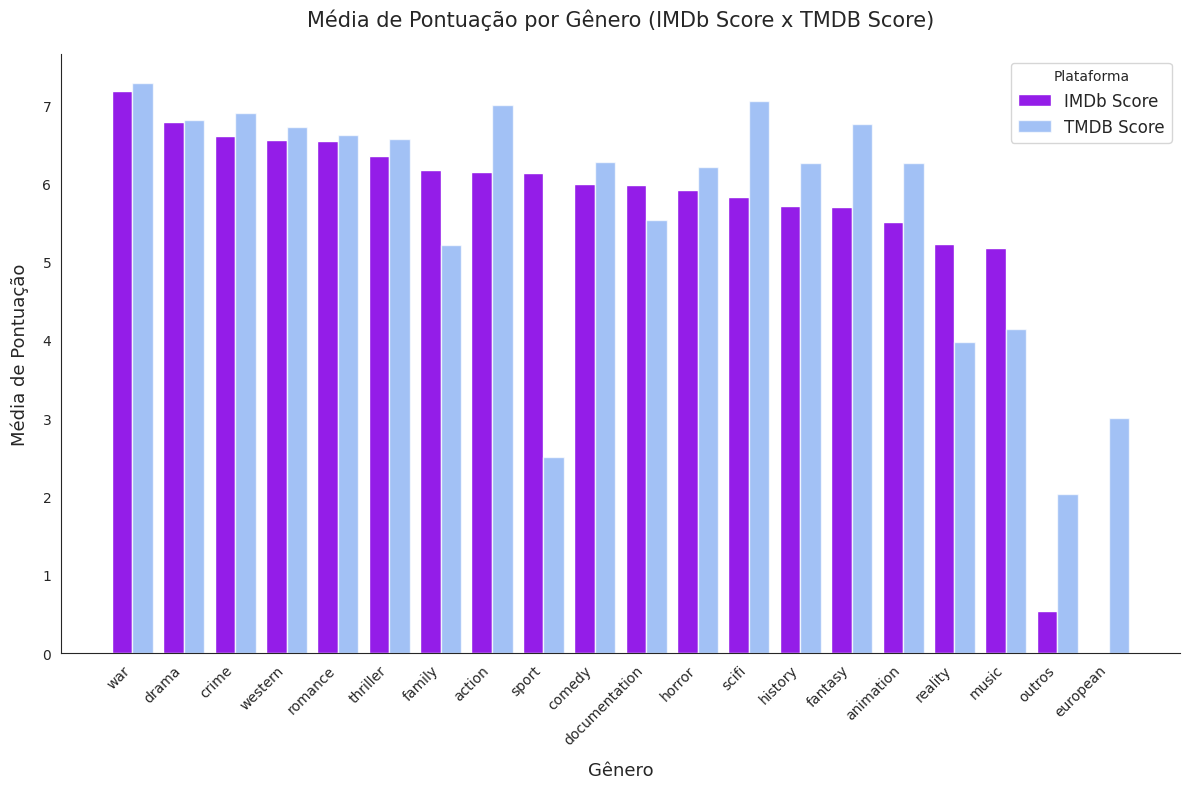

In [156]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Definir as cores das barras
colors = ['#941de8', '#7ba7f2']

# Calcular a largura das barras agrupadas
bar_width = 0.4

# Definir os índices para as barras
index = np.arange(len(genre_scores_mean))

# Plotar as barras do IMDb Score
plt.bar(index, genre_scores_mean['IMDb Score'], width=bar_width, color=colors[0], label='IMDb Score')

# Plotar as barras do TMDB Score
plt.bar(index + bar_width, genre_scores_mean['TMDB Score'], width=bar_width, color=colors[1], alpha=0.7, label='TMDB Score')

# Adicionar legendas e título
plt.title('Média de Pontuação por Gênero (IMDb Score x TMDB Score)', fontsize=15, pad=20)
plt.xlabel('Gênero', fontsize=13, labelpad=10)
plt.ylabel('Média de Pontuação', fontsize=13, labelpad=10)

# Definir os rótulos do eixo x
plt.xticks(index + bar_width / 2, genre_scores_mean.index, rotation=45, ha='right')

# Exibir o gráfico
plt.legend(title='Plataforma', fontsize=12, loc='upper right')
plt.tight_layout()
sns.despine()
plt.show()